In [601]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
pd.set_option('display.max_columns', None)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [602]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [603]:
%%R

require('ggplot2')
require('readr')
require('extrafont')
require('dplyr')
require('reshape2')
require('tidyverse')

Rows: 8760 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): variable
dbl (2): year, value

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


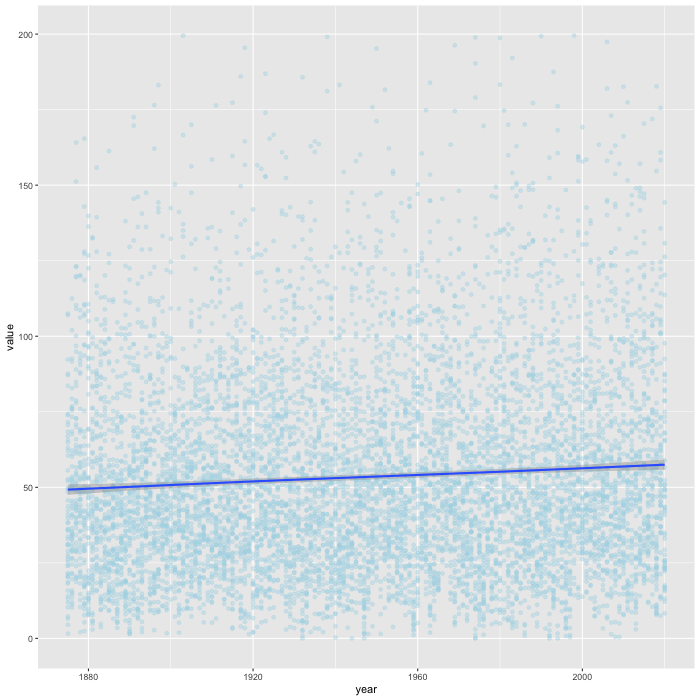

In [646]:
%%R -w 700 -h 700

data <- read_csv('data/dk_monthly_1874_2020.csv')

data <- data %>%
    filter(value < 200)

ggplot(data, aes(x=year, y=value)) +
    geom_point(alpha=0.4, color='lightblue') +
    geom_smooth() 

Rows: 71 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): year, annual

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`geom_smooth()` using formula = 'y ~ x'


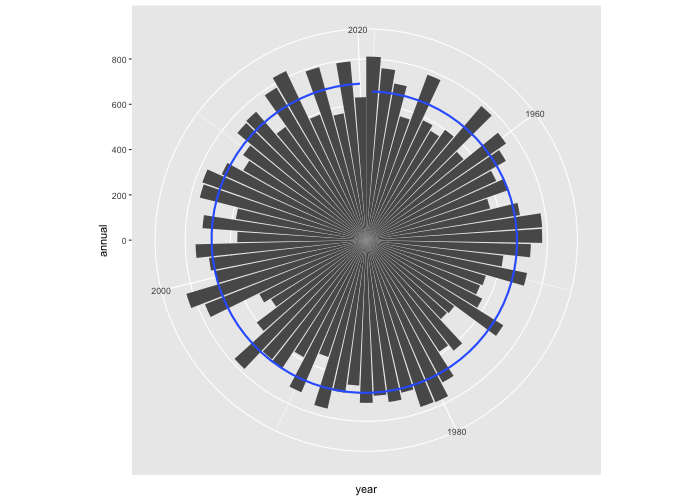

In [605]:
%%R -w 700 -h 500

data <- read_csv('data/dk_yearly_1950_2020.csv')

ggplot(data, aes(x=year, y=annual)) +
    geom_col() +
    geom_smooth(method=lm, se = F) +
    coord_polar()

Rows: 4260 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): month
dbl (4): year, rainfall, decade, month_num

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


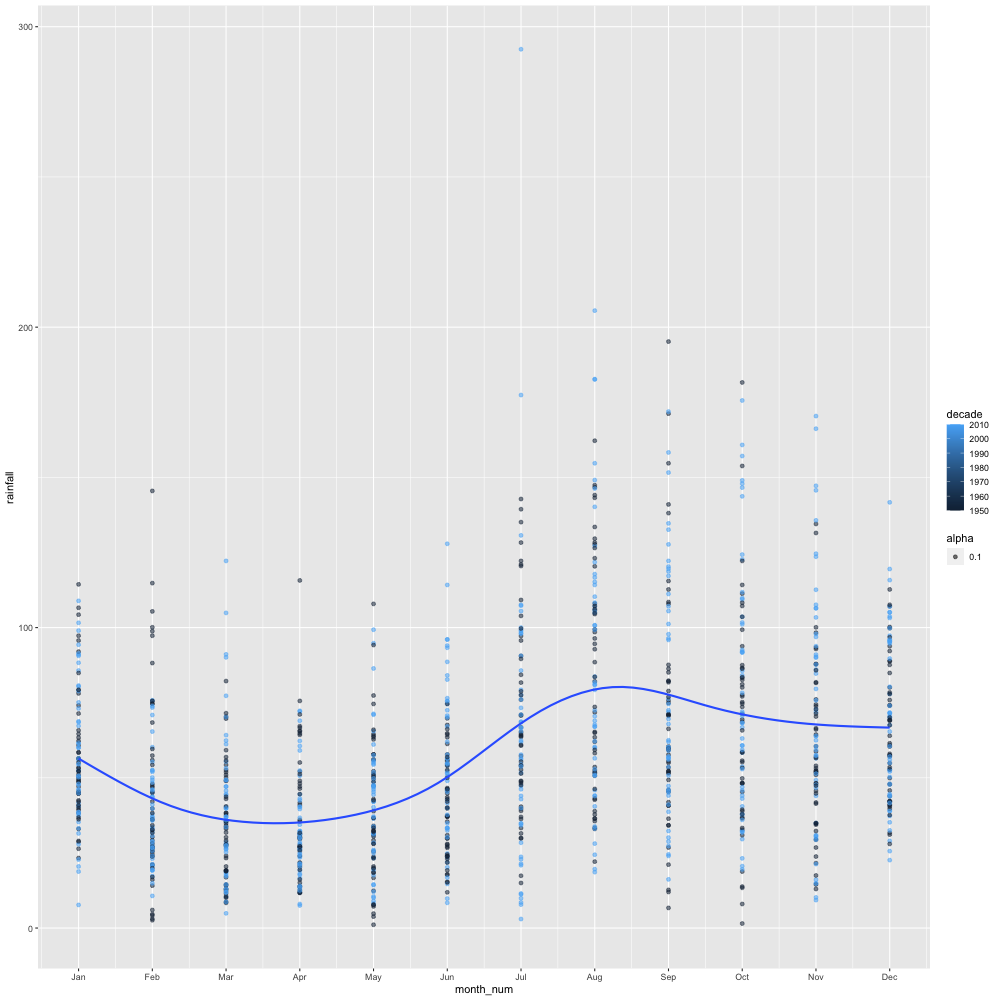

In [606]:
%%R -h 1000 -w 1000

data <- read_csv('data/dk_monthly_1950_2020.csv')

data <- data %>%
    filter(grepl('1950|2010', decade))

ggplot(data, aes(x=month_num, y=rainfall, color=decade)) +
    geom_point(aes(alpha=0.1)) +
    geom_smooth(se = F) +
    scale_x_continuous(breaks=seq(1, 12, 1), labels=month.abb)

In [607]:
import pandas as pd

data = pd.read_csv('data/dk_monthly_1950_2020.csv')


# Create a new century column where the decades are grouped into centuries
data = data.astype({'decade': 'str'})
data['century'] = data['decade'].apply(lambda x: x[:2] + '00')
data = data.astype({'decade': 'int', 'century': 'int'})

data10 = data.groupby(['decade','month_num']).mean().reset_index()
data100 = data.groupby(['century','month_num']).mean('rainfall').reset_index()

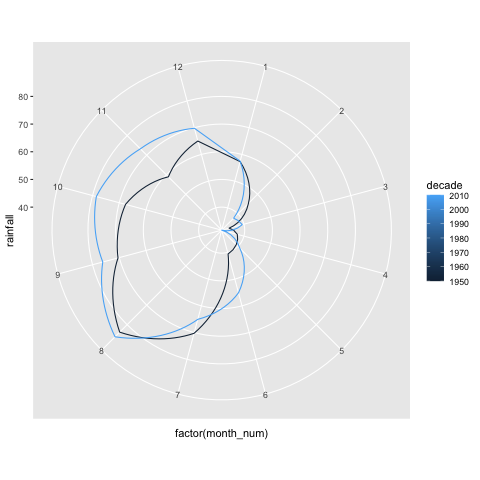

In [608]:
%%R -i data10

data10 <- data10 %>%
    filter(grepl('1950|2010', decade))

ggplot(data10, aes(x = factor(month_num), y = rainfall, group = decade, color = decade)) +
  geom_polygon(fill = NA) + 
  coord_polar()

In [635]:
df = pd.read_csv('data/dk_monthly_1874_2020.csv')

In [636]:
# Group the data into decades
def conditions(s):
    if s['year'] > 1991:
        return 1991
    elif s['year'] > 1961:
        return 1961
    elif s['year'] > 1931:
        return 1931
    elif s['year'] > 1901:
        return 1901
    else:
        return 1874

In [637]:
df['thirty_years'] = df.apply(conditions, axis=1)
df

,year,variable,value,thirty_years
0,1875,jan,64.8,1874
1,1876,jan,14.7,1874
2,1877,jan,96.8,1874
3,1878,jan,56.5,1874
4,1879,jan,2.4,1874
...,...,...,...,...
8755,2016,dec,32.5,1991
8756,2017,dec,50.3,1991
8757,2018,dec,74.0,1991
8758,2019,dec,41.6,1991


In [638]:
# Get a numerical column for months
df['month_num'] = df['variable'].apply(lambda x: '01' if x == 'jan' else '02' if x == 'feb' else '03' if x == 'mar' else '04' if x == 'apr' else '05' if x == 'may' else '06' if x == 'jun' else '07' if x == 'jul' else '08' if x == 'aug' else '09' if x == 'sep' else '10' if x == 'oct' else '11' if x == 'nov' else '12')

df = df.groupby(['thirty_years','month_num']).mean('value').reset_index()

df.head(5)

,thirty_years,month_num,year,value
0,1874,01,1888.0,38.197778
1,1874,02,1888.0,31.882222
2,1874,03,1888.0,37.788889
3,1874,04,1888.0,31.909630
4,1874,05,1888.0,38.285926


In [639]:
%%R -i df

library(ggridges)


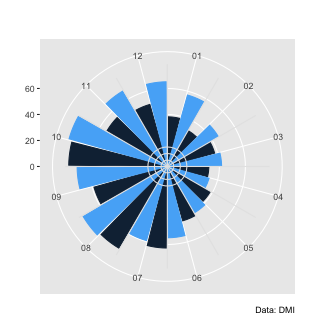

In [640]:
%%R -i df -w 320 -h 320

df <- df %>%
    filter(grepl('1874|1991', thirty_years))

ggplot(df, aes(x = factor(month_num), y = value, group = thirty_years, color = thirty_years)) +
    geom_col(aes(fill = thirty_years), position = position_dodge(width = 1)) +
    geom_vline(xintercept = 1:13 - 0.5, color = "gray90") +
    geom_hline(yintercept = 0:3 * 5, color = "gray90") +
    coord_polar() +
    labs(x = NULL, y = NULL ,
       title = "",
       subtitle = "",
       caption = "Data: DMI") +
    theme(legend.position = "none")

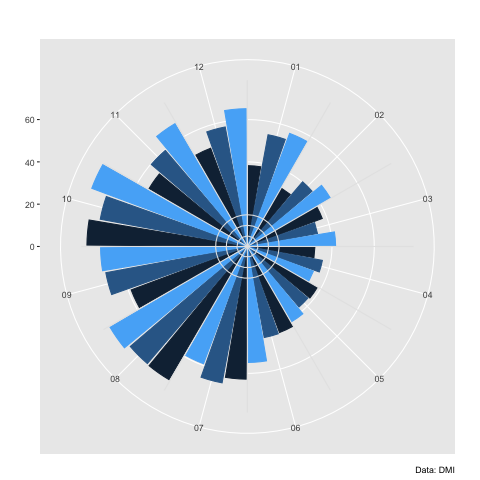

In [615]:
%%R -i df

df <- df %>%
    filter(grepl('1874|1931|1991', thirty_years))

ggplot(df, aes(x = factor(month_num), y = value, group = thirty_years, color = thirty_years)) +
    geom_col(aes(fill = thirty_years), position = position_dodge(width = 1)) +
    geom_vline(xintercept = 1:13 - 0.5, color = "gray90") +
    geom_hline(yintercept = 0:3 * 5, color = "gray90") +
    coord_polar() +
    labs(x = NULL, y = NULL ,
       title = "",
       subtitle = "",
       caption = "Data: DMI") +
    theme(legend.position = "none")

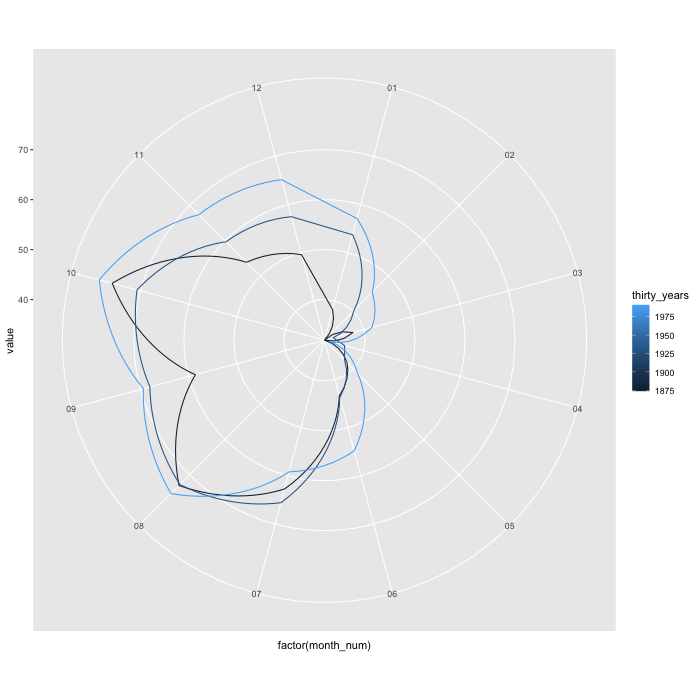

In [616]:
%%R -i df -w 700 -h 700

df <- df %>%
    filter(grepl('1874|1931|1991', thirty_years))

ggplot(df, aes(x = factor(month_num), y = value, group = thirty_years, color = thirty_years)) +
  geom_polygon(fill = NA) +
  coord_polar()

In [696]:
data = pd.read_csv('data/dk_yearly_averages_1974_2020.csv', na_values='NaN')
data = data.dropna()

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


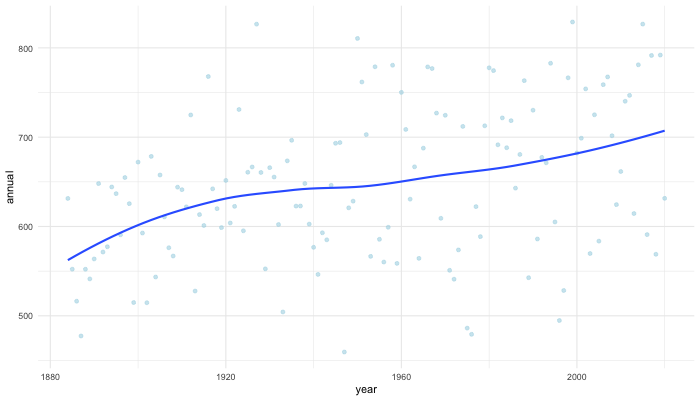

In [697]:
%%R -i data -h 400 -w 700

ggplot(data, aes(x=year, y = annual)) +
    geom_point(alpha=0.6, color='lightblue') +
    geom_smooth(se = F) +
    theme_minimal()

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


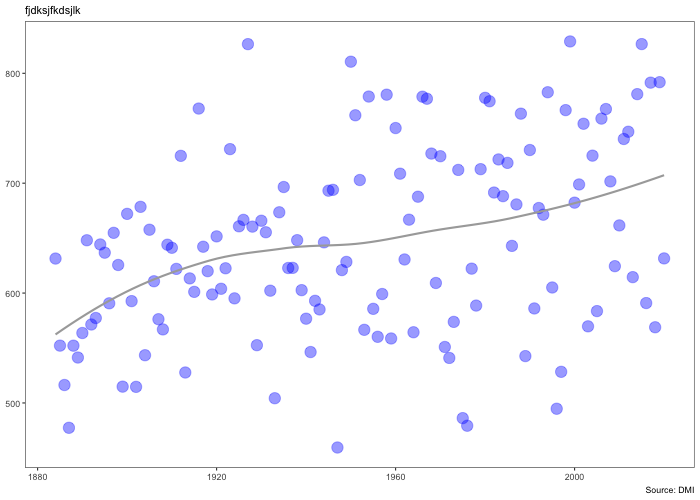

In [718]:
%%R -i data -h 500 -w 700


plot <- ggplot(data, aes(x=year, y = annual)) +
    geom_point(color='blue', size=5, alpha=0.4) +
    geom_smooth(se = F, color='dark grey') +
    theme_bw() +
    labs(x = NULL, y = NULL,
       subtitle = "fjdksjfkdsjlk",
       caption = "Source: DMI")  +
    theme(legend.position = "none",
        panel.grid.minor = element_blank(),
        panel.grid.major = element_blank())

plot


In [712]:
%%R -h 500 -w 700
plot
ggsave("visuals/rain_computer.pdf", dpi = 300)

Saving 9.72 x 6.94 in image
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


In [713]:
%%R -h 400 -w 480
plot
ggsave("visuals/rain_tablet.pdf", dpi = 300)

Saving 6.67 x 5.56 in image
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


In [714]:
%%R -h 350 -w 320
plot
ggsave("visuals/rain_mobile.pdf", dpi = 300)

Saving 4.44 x 4.86 in image
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


Rows: 21915 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (7): stat_no, year, month, day, hour, elem_val, day_of_year
lgl  (1): before_1990
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


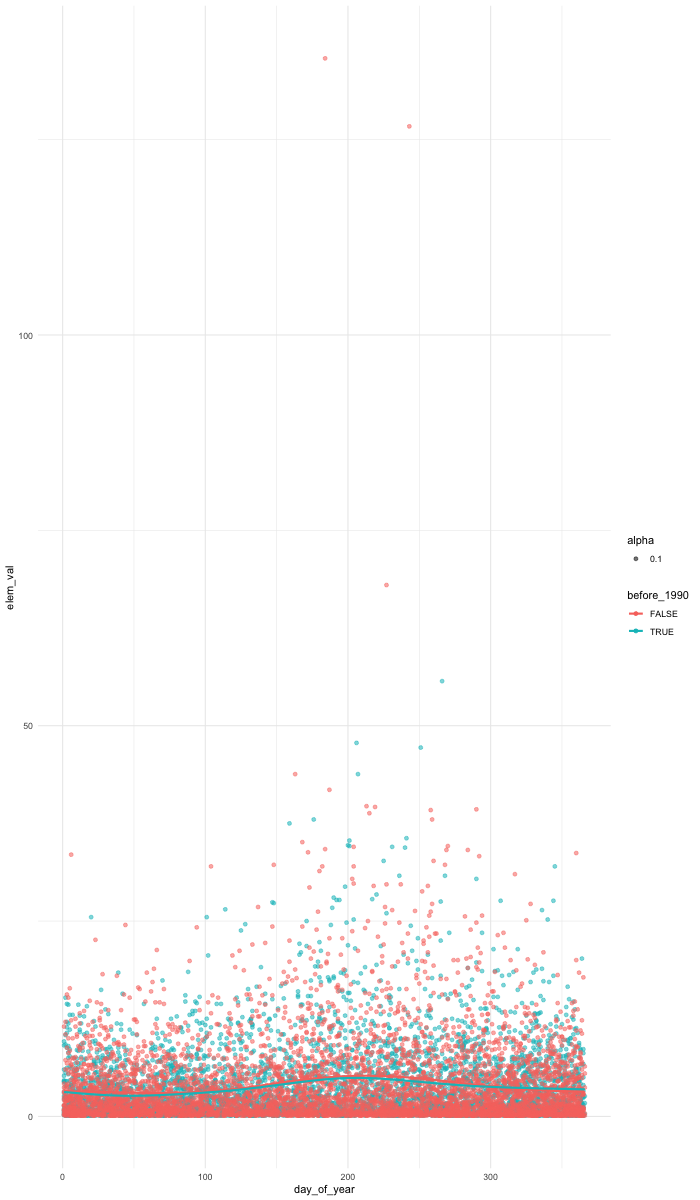

In [682]:
%%R -w 700 -h 1200

data <- read_csv('data/cph_daily.csv')

data <- data %>%
    filter(elem_val > 0)

ggplot(data, aes(x = day_of_year, y = elem_val, color=before_1990)) +
    geom_point(aes(alpha = 0.1)) +
    geom_smooth(se = F) +
    theme_minimal()

In [686]:
df = pd.read_csv('data/cph_daily.csv')

# create a decade column
def conditions(s):
    if s['year'] > 2019:
        return 2020
    elif s['year'] > 2009:
        return 2010
    elif s['year'] > 1999:
        return 2000
    elif s['year'] > 1989:
        return 1990
    elif s['year'] > 1979:
        return 1980
    elif s['year'] > 1969:
        return 1970
    else:
        return 1960
df['decade'] = df.apply(conditions, axis=1)

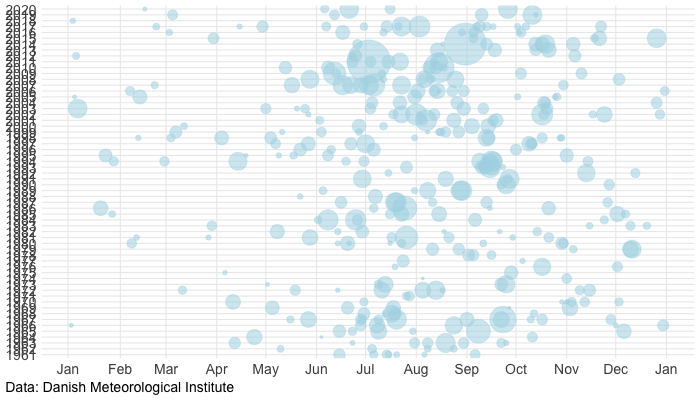

In [693]:
%%R -i df -h 400 -w 700

df <- df %>%
    filter(elem_val > 15)

plot <- ggplot(df, aes(x = day_of_year, y = factor(year), size=elem_val)) +
    geom_point(aes(alpha = 0.4), color='lightblue') +
    scale_size(range=c(1,20),breaks=c(15,25,50,100),labels=c("+15 mm","+25 mm","+50 mm","+100 mm"),guide="legend")+
    scale_alpha(range=c(0.1,1),guide="none") +
    theme_minimal() +
    labs(x = NULL, y = NULL,
       caption = "Data: Danish Meteorological Institute") +
    theme(axis.title.x = element_text(vjust = 0, size = 14),
        axis.text = element_text(size = 14),
        axis.text.x = element_text(size = 14),
        plot.caption = element_text(hjust = 0, size = 14),
        plot.title.position = "plot",
        plot.caption.position = "plot",
        panel.grid.minor = element_blank(),
        legend.position = "none") 

plot <- plot + scale_x_continuous(breaks=c(0, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335, 366),
    labels=c("Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec","Jan"))

plot

In [695]:
%%R -h 400 -w 520
plot
ggsave("visuals/cph_rain_tablet.pdf", dpi = 300)

Saving 7.22 x 5.56 in image


In [633]:
%%R -h 400 -w 480
plot
ggsave("visuals/cph_rain_tablet.pdf", dpi = 300)

Saving 6.67 x 5.56 in image


In [631]:
%%R -h 350 -w 320
plot
ggsave("visuals/cph_rain_mobile.pdf", dpi = 300)

Saving 4.44 x 4.86 in image


R[write to console]: Picking joint bandwidth of 2.39



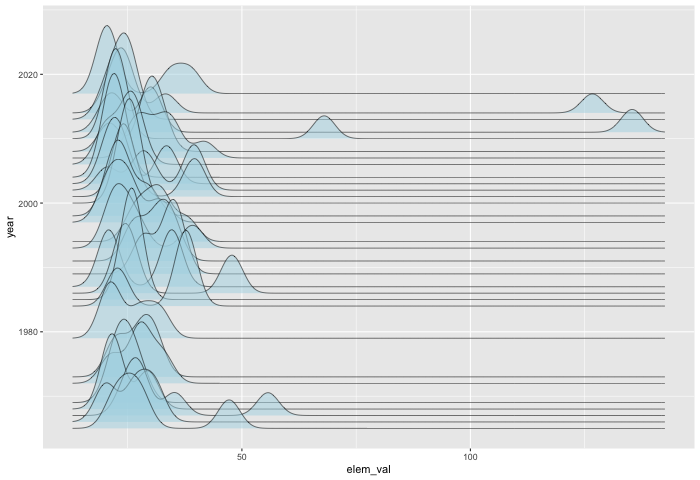

In [626]:
%%R -i df -w 700

library(ggridges)
library(ggplot2)

df <- df %>%
    filter(elem_val > 20)

ggplot(df, aes(x=elem_val, y=year, group=year)) +
  geom_density_ridges(scale = 10, size = 0.25, alpha = 0.5, fill = "lightblue")